# Twitter Data Analysis

In this project, we will analyse the tweets with the most trending hashtag in New Delhi.

So there are 3 steps involved in this process. 

1. Getting the data from Twitter

2. Present the data in a proper format so that it can be analysed easily

3. Analyse the data

We will be working with python and Twitter API. 


## Extracting data from twitter


I have used Twitter API tweepy for doing this. So, we will start with installing tweepy. 

In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


Now, make a developer account on twitter. You might need to wait for some time before it gets approved
 
In the developer account click on "Create a new App" and you will be given credentials. 

Now , we will include those credentials to make GET requests from twitter api.

In [2]:
import tweepy
consumer_key= 'YBA2m8JJ9cy3E9wXxVi2yYcX8'
consumer_secret= 'HFMeoWIOhDZAjbDpfgAyujxSSZEQI5BAOuGxPiQRT4HniPk9cq'
access_token= '1342378688453648384-tVtbtEATUh3NpZWttbaoKFp438NXpI'
access_token_secret= 'FTvj3KU0oJCe9ZJBGGnKDAMPhU6eICcqV7GqfUGu1a68Y'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api=tweepy.API(auth)

Now, to avoid running our program repetitively, we will want to store all the tweets in a file. So we will create a new text file "json_dumps.txt"

In [3]:
import os
import json
import sys
import tweepy
import io

File = io.open('json_dumps.txt', 'w', encoding="utf-8")


Now we will make the GET request. Note three things:

1. We are using the hashtag "cricket" as, without retweets we can get more than 10000 tweets.  

2. We will be using a filter for retweets(for uniqueness)


In [4]:
tweet_data =  tweepy.Cursor(api.search,q="#cricket"+" -filter:retweets",geocode="28.7041,77.1025,100km", count=11000,lang="en").items(11000)
#tweet_data does extract the top trending hashtag win a particular location and works well but here we want a large number of tweets
#(> 10000). So for now I have considered a really popular topic and location to be anywhere. 


tweet_data =  tweepy.Cursor(api.search,q="#cricket"+" -filter:retweets", count=11000,lang="en").items(11000)

We will be storing the tweets in a csv file as well. For this we will use pandas.So , using open() we create a new csv file and then  import pandas and create a dataframe.



In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-dateutil>=2.7.3 in c:\programdata\anaconda3\lib\site-packages (from pandas) (2.8.1)



In [6]:

import pandas as pd
df = pd.DataFrame()

csv_file = io.open("tweets_info.csv", "w", encoding="utf-8")


Now , we will iterate through all the tweets in the tweet_data object. Every tweet has a _json_ attribute to it that contains all the info about the tweet. So we will write the json strings to the text file and the csv file.

In [7]:
i = 0;
for tweet in  tweet_data:    
    if (hasattr(tweet , "_json")):
        i += 1;
        File.write(json.dumps(tweet._json))
        File.write("\n")
        df_2 = pd.json_normalize(tweet._json)
        df = df.append(df_2, ignore_index=True)
        print(i)
        if (i >=11000):
            print(i)
            break;
export_csv = df.to_csv(csv_file, index = None, header=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [8]:
print(i)

11000


Voila!! We have got all the tweets and we have got them in a suitable format too 

##  Analysis of  the data.  

Now we have got all the stuff in csv file. So let's start with making a wordcloud for all the tweets. 
Start with getting text of all the posts in the tweets. For this, to pevent the need of repititive computation, we will first store all the words of the posts in a text file.

My initial approach was iterating through each tweet, extracting it's post text as a string and then split the string with spaces to get tokens. But the process is too slow and time taking. So for this, we will use spacy module in python.

So start with installing it through pip on your system. 

In [9]:
pip install -U spacy

Requirement already up-to-date: spacy in c:\programdata\anaconda3\lib\site-packages (2.3.5)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied, skipping upgrade: murmurhash<1.1.0,>=0.28.0 in c:\programdata\anaconda3\lib\site-packages (from spacy) (1.0.5)



In [10]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019126 sha256=4c7f4ea977db25fc497a341d8481239f7da060ed09de4e77402244417b22f86e
  Stored in directory: c:\users\ayush\appdata\local\pip\cache\wheels\fc\31\e9\092e6f05b2817c9cb45804a3d1bf2b9bf6575742c01819337c
Successfully built en-core-web-sm


Import all required modules first. And then read the info stored in the tweets.text column in the csv file into a dataframe. 


In [11]:
import os
import spacy
import io
from spacy.lang.en import English
# Use it on Jupyter Notebook or Google Colab
# DIR_PATH = os.getcwd()
# Use it on Python module
DIR_PATH = os.path.dirname("__file__")

FILE_PATH = r"C:\Users\ayush\OneDrive\Desktop\PRECog\Q2\tweets_info.csv"

import pandas as pd

# Read the file
df = pd.read_csv("tweets_info.csv")

Now iterate through all rows in the dataframe and save all the individual words in a list. 

In [12]:
import en_core_web_sm


final_list = []
for i in range(11000):
    try:
        first_dialogue = df.loc[i, "text"]
        if first_dialogue == None:
            break;
        # use spacy with the  parse
        nlp = en_core_web_sm.load()
        [str(sent) for sent in nlp(first_dialogue).sents]


        # use spacy with the sentencizer
        nlp = English()  # just the language with no model
        sentencizer = nlp.create_pipe("sentencizer")
        nlp.add_pipe(sentencizer)
        k = [str(sent) for sent in nlp(first_dialogue).sents]
        for K in k:
            final_list.append(K)
            print(i)
    except:
        continue;

C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


0
1
2
2
3
3
4
4
5
5
6
6
7
8
9
9
9
10
10
11
12
13
13
14
15
15
16
16
17
17
17
18
19
20
21
21
22
23
23
24
24
25
26
26
27
28
28
29
30
31
31
32
33
34
35
35
36
37
38
38
38
39
39
39
40
41
42
42
43
43
44
45
45
45
45
45
46
47
47
48
48
49
49
49
50
51
51
52
53
54
55
56
56
56
57
58
59
59
59
60
61
61
61
61
62
62
62
62
63
63
64
64
64
65
65
66
67
68
68
69
69
69
70
70
70
71
72
73
73
74
74
74
74
75
76
77
77
77
78
79
79
80
80
81
81
82
82
83
84
84
85
86
87
87
87
88
89
90
91
91
92
93
93
94
95
95
95
96
97
97
98
98
98
98
98
99
99
100
100
100
101
102
102
102
103
103
104
105
105
106
107
107
108
108
108
109
109
110
110
111
112
112
113
114
115
115
116
116
116
116
116
116
117
118
118
119
119
120
121
121
122
122
122
123
123
123
124
125
126
127
127
128
128
129
129
130
130
131
132
132
132
132
133
133
133
134
134
135
135
136
137
137
137
138
139
139
139
140
140
140
141
142
142
143
143
143
143
143
144
144
145
146
147
148
148
148
149
149
149
149
150
150
150
150
151
151
151
152
153
154
154
154
155
156
157
158
159
160
16

Now save this list in a text file for future analysis. 

In [13]:
with io.open("list_of_posts.txt", "w", encoding="utf-8") as f:
    f.write((' '.join([str(elem) for elem in final_list])))

Now, we can start with making a word cloud for all the posts related to the hashtag cricket. 

Start with importing all the files. 

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import io


Store the data of the posts in a string. 

In [16]:
with io.open("list_of_posts.txt", "r", encoding="utf-8") as file:
    data = file.read().replace('\n', '')

Now use the wordcloud and pyplot module to display the wordCloud. 

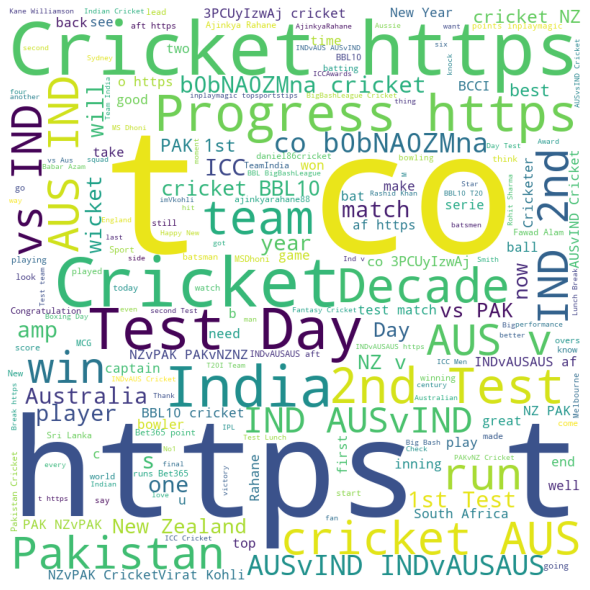

In [17]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(data) 
stopwords.add("https")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


Now, lets analyse make a word cloud for the description of the users who tweeted related to cricket. We will plot histograms for the same. 

So we will repeat the same process as before. 

So we can infer the follwing from the above wordCloud. 

1. AUS vs IND match is trending. 
2. Ajyinke Rahane is trenfing
3. Pakistan, New Zealand, India and many cricketers like Ajyinke Rahane, Virat Kohli , MS Dhoni are mentioned frequently
4. We  could also say that links are shared very frequently on those tweets due to prominence of https in the word cloud.

In [ ]:
import os
import spacy
import io    
from spacy.lang.en import English
# Use it on Jupyter Notebook or Google Colab
# DIR_PATH = os.getcwd()
# Use it on Python module
# DIR_PATH = os.path.dirname(__file__)

FILE_PATH = "tweets_info.csv"

import pandas as pd

# Read the file
df = pd.read_csv(FILE_PATH)
# Assign first_dialogue to the first row's "Dialogue" column
final_list = []
for i in range(11000):
    try:
        first_dialogue = df.loc[i, "user.description"]
      
        print(first_dialogue)
        # if first_dialogue == None:
        # 	break;	
        # use spacy with the dependency parse 
        nlp = spacy.load("en_core_web_sm")
        #[str(sent) for sent in nlp(first_dialogue).sents]


        # use spacy with the sentencizer
        nlp = English()  # just the language with no model
        sentencizer = nlp.create_pipe("sentencizer")
        nlp.add_pipe(sentencizer)
        final_list.append(first_dialogue)
        # try:
        # 	if (not(first_dialogue == nan)):
        # 		k = [str(sent) for sent in nlp(first_dialogue).sents]
        # 		print(k)
        # 		for K in k:
        # 			final_list.append(K)
        # 		print(i)
        # except:
        # 	print("Ok")
    except:
        continue;
with io.open("list_of_user_description.txt", "w", encoding="utf-8") as f:
    f.write((' '.join([str(elem) for elem in final_list])))


Now we will make the word cloud. 

In [ ]:
# Python program to generate WordCloud 
with io.open("list_of_user_description.txt", "w", encoding="utf-8") as f:
    f.write((' '.join([str(elem) for elem in final_list])))
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import io

# Reads 'Youtube04-Eminem.csv' file 
with io.open("list_of_user_description.txt", "r", encoding="utf-8") as file:
    data = file.read().replace('\n', '')

comment_words = '' 
STOPWORDS.add("https")
STOPWORDS.add("will")
STOPWORDS.add("t")
STOPWORDS.add("co")
STOPWORDS.add("Please")
stopwords = set(STOPWORDS) 

# # iterate through the csv file 
# for tokens in data: 
	
# 	tokens = tokens.lower()
# 	print(tokens) 
	
# 	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(data) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


Now we will analyse the sentiment of the posts(positive, negative and neutral) and will present the findings with a bar chart. We have used a textblob module for this.  


In [ ]:
from textblob import TextBlob
import os
import spacy
import io
from spacy.lang.en import English
import matplotlib.pyplot as plt
# Use it on Jupyter Notebook or Google Colab
# DIR_PATH = os.getcwd()
# Use it on Python module


FILE_PATH =  "tweets_info.csv"

import pandas as pd

# Read the file
df = pd.read_csv(FILE_PATH)
# Assign first_dialogue to th
df["polarity"] =df['text'].apply(lambda tweet: TextBlob(tweet).polarity)

# print(df["polarity"])

positive  = 0
negative = 0
neutral = 0;

for dub in df["polarity"]:
# 	print(dub)
	if dub > 0:
		positive += 1;
	if (dub< 0):
		negative += 1;
	if (dub == 0):
		neutral += 1;

label1 = ["positive", "negative", "neutral"]
label2 = [positive, negative, neutral]
# plt.set_title('Polarity of the tweets') 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# ax.xlabel("Polarity")
ax.bar(label1, label2)
plt.show()

from matplotlib import pyplot as plt 
import numpy as np 
  
  
# Creating dataset 
# a = np.array(df["user.followers_count"]) 
  
# # Creating histogram 
# fig, ax = plt.subplots(figsize =(10, 7),  
#                         tight_layout = True) 
# ax.hist(a, bins = 1000 ,
#                    color='#607c8e') 
  
# # Show plot 
# plt.show() 

a = np.array(df["user.followers_count"])

# print(df["user.followers_count"]) 
# Creating histogram 
fig, ax = plt.subplots(figsize =(100, 70)) 
ax.xaxis.label.set_size(1000)
ax.yaxis.label.set_size(20)
ax.set_title('No of people that follow the users') 
ax.set_ylabel('Corresponding Number of Users', fontsize = 100.0) # Y label
ax.set_xlabel('Followers', fontsize = 100) # X label
# cks = np.arange(0, 10000000, 100)x_ti
# plt.xticks(x_ticks)
ax.hist(a, bins = [0, 250, 500, 1000,2500, 5000,10000,20000,30000,40000, 50000, 60000, 70000, 80000, 90000, 100000])
ax.set_xticklabels([0, 250, 500, 1000,2500, 5000,10000,20000,30000,40000, 50000, 60000, 70000, 80000, 90000, 100000], rotation=0, fontsize=100)
# ax.xlabel("Followers")
ax.set_yticklabels([0, 500,  1000,2500, 5000,10000,20000,30000,40000, 50000, 60000, 70000, 80000, 90000, 100000], rotation=0, fontsize=100)
# ax.set_xlabel('marks')
# ax.set_ylabel('no. of students') 


# Show plot 
plt.show() 

from matplotlib import pyplot as plt 
import numpy as np 
  
  
# Creating dataset 
# a = np.array(df["user.followers_count"]) 
  
# # Creating histogram 
# fig, ax = plt.subplots(figsize =(10, 7),  
#                         tight_layout = True) 
# ax.hist(a, bins = 1000 ,
#                    color='#607c8e') 
  
# # Show plot 
# plt.show() 

a = np.array(df["user.friends_count"])

# print(df["user.friends_count"]) 
# Creating histogram 
fig, ax = plt.subplots(figsize =(100, 70)) 
# cks = np.arange(0, 10000000, 100)x_ti
# plt.xticks(x_ticks)
ax.hist(a, bins = [0, 250, 500, 1000,2500, 5000,10000,20000,30000,40000, 50000, 60000, 70000, 80000, 90000, 100000])
ax.set_xticklabels([0, 250, 500, 1000,2500, 5000,10000,20000,30000,40000, 50000, 60000, 70000, 80000, 90000, 100000], rotation=0, fontsize=100)
ax.set_yticklabels([0, 500,  1000,2500, 5000,10000,20000,30000,40000, 50000, 60000, 70000, 80000, 90000, 100000], rotation=0, fontsize=100)
ax.set_title('Friends Count') 
ax.set_title('v = 1',fontweight="bold", size=20) # Title
ax.set_ylabel('Corresponding Number of Users', fontsize = 100.0) # Y label
ax.set_xlabel('Friends', fontsize = 100) # X label
# ax.xlabel("Friends")
# ax.set_xlabel('marks')
# ax.set_ylabel('no. of students') 


# Show plot 
plt.show() 

For Polarity:

1. Most of the tweets are neutral in nature and less that 10% of the tweets are negative. This can be because the neutral and positive tweets are mostly information based where the users were giving updates and cheering for their favourite player or team.  

For Followers:

1. Highest number of users have followers in the range of 250-500, and as the number increases the number of followers  decreases. Surprisingly , no user, who tweeted related to the tweets, has followers less than 250 and a very small fraction of users have followers greater than 5000. 

This shows that the users are very active on twitter and seeing the description word cloud of the users and the polarity graph for cricket, one may conclude that they might be having good follower count(> 250) due to their cricket background. 


For Friends:
1. Highest number of users have number of friends in the range of 250-400. We find that very few users have friends greater than 750.



Now we will make a wordCloud of the tags associated with cricket that have been used. 

In [ ]:
import os
import spacy
import io
from spacy.lang.en import English
# Use it on Jupyter Notebook or Google Colab
# DIR_PATH = os.getcwd()
# Use it on Python module

FILE_PATH =  "tweets_info.csv"

import pandas as pd

# Read the file
df = pd.read_csv(FILE_PATH)
# Assign first_dialogue to the first row's "Dialogue" column
final_list = []
for i in range(11000):
    print(i)
    try:
        first_dialogue = df.loc[i, "entities.hashtags"]
        print(i)
        print(first_dialogue)
        # if first_dialogue == None:
        # 	break;	
        # use spacy with the dependency parse 
        nlp = spacy.load("en_core_web_sm")
        #[str(sent) for sent in nlp(first_dialogue).sents]


        # use spacy with the sentencizer
        nlp = English()  # just the language with no model
        sentencizer = nlp.create_pipe("sentencizer")
        nlp.add_pipe(sentencizer)
        final_list.append(first_dialogue)
    # try:
    # 	if (not(first_dialogue == nan)):
    # 		k = [str(sent) for sent in nlp(first_dialogue).sents]
	# 		print(k)
	# 		for K in k:
	# 			final_list.append(K)
	# 		print(i)
    except:
        print("Ok")
with io.open("list_of_hashtags_associated_with_tweets.txt", "w", encoding="utf-8") as f:
    f.write((' '.join([str(elem) for elem in final_list])))

Now we need to use wordCloud. 

In [ ]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import io

# Reads 'Youtube04-Eminem.csv' file 
with io.open("list_of_hashtags_associated_with_tweets.txt", "r", encoding="utf-8") as file:
    data = file.read().replace('\n', '')

comment_words = '' 
STOPWORDS.add("https")
STOPWORDS.add("will")
STOPWORDS.add("t")
STOPWORDS.add("co")
STOPWORDS.add("Please")
STOPWORDS.add("text'")
STOPWORDS.add("text '")
STOPWORDS.add("text")
STOPWORDS.add("indices'")
STOPWORDS.add("cricket")
STOPWORDS.add("cricket'")
stopwords = set(STOPWORDS) 

# # iterate through the csv file 
# for tokens in data: 
	
# 	tokens = tokens.lower()
# 	print(tokens) 
	
# 	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(data) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


We observe two things from this:

1. Most of the tags are related to matches (like AUS vs IND, NZ vs PAK, SA vs SL)
2. Individual countries have been tagged frequently. 
3. Popular cricketers have been tagged frequently. 
4. Other than this famous celebration days about "Happy New Year" , "Boxing Day" etc. 

Let's try to understand how often tweets related to cricket are retweeted, as while extracting the data, we were filtering out retweets to maintain uniqueness. 

Now to analyse users, lets first understand what is the distrubution of number of followers each user has vs distribution of number of people being followed by the users. 

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd


from matplotlib import pyplot as plt 
import numpy as np 
df = pd.read_csv("tweets_info.csv")
a = np.array(df["user.statuses_count"])

print(df["user.statuses_count"]) 
# Creating histogram 
fig, ax = plt.subplots(figsize =(100, 70)) 
# cks = np.arange(0, 10000000, 100)x_ti
# plt.xticks(x_ticks)
ax.hist(a, bins = [0, 250, 500, 1000,2500, 5000,10000,20000,30000,40000, 50000, 60000, 70000, 80000, 90000, 100000])
ax.set_xticklabels([0, 250, 500, 1000,2500, 5000,10000,20000,30000,40000, 50000, 60000, 70000, 80000, 90000, 100000], rotation=0, fontsize=10)


# ax.set_xlabel('marks')
# ax.set_ylabel('no. of students') 


# Show plot 
plt.show() 

Make a word cloud of description of users to understand what walks of life cricket tweeters come from :D. 

We observe that all users have put at least 250 statuses on twitter, which justifies our reasoning that the users who tweet about cricket are generally very active on twitter. Highest range of statuses are from 250 to 5000. 

In [ ]:
import os
import spacy
import io
from spacy.lang.en import English
# Use it on Jupyter Notebook or Google Colab
# DIR_PATH = os.getcwd()
# Use it on Python module


FILE_PATH =  "tweets_info.csv"

import pandas as pd

# Read the file
df = pd.read_csv(FILE_PATH)
# Assign first_dialogue to the first row's "Dialogue" column
final_list = []
for i in range(11000):
	first_dialogue = df.loc[i, "user.description"]
	print(i)
	print(first_dialogue)
	# if first_dialogue == None:
	# 	break;	
	# use spacy with the dependency parse 
	nlp = spacy.load("en_core_web_sm")
	#[str(sent) for sent in nlp(first_dialogue).sents]

	
	# use spacy with the sentencizer
	nlp = English()  # just the language with no model
	sentencizer = nlp.create_pipe("sentencizer")
	nlp.add_pipe(sentencizer)
	final_list.append(first_dialogue)
	# try:
	# 	if (not(first_dialogue == nan)):
	# 		k = [str(sent) for sent in nlp(first_dialogue).sents]
	# 		print(k)
	# 		for K in k:
	# 			final_list.append(K)
	# 		print(i)
	# except:
	# 	print("Ok")
with io.open("list_of_user_description.txt", "w", encoding="utf-8") as f:
    f.write((' '.join([str(elem) for elem in final_list])))

In [ ]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import io

# Reads 'Youtube04-Eminem.csv' file 
with io.open("list_of_user_description.txt", "r", encoding="utf-8") as file:
    data = file.read().replace('\n', '')

comment_words = '' 
STOPWORDS.add("https")
STOPWORDS.add("RahulGandhi")
STOPWORDS.add("Rahul Gandhi")
STOPWORDS.add("Rahul")
STOPWORDS.add("will")
STOPWORDS.add("t")
STOPWORDS.add("co")
STOPWORDS.add("Please")
STOPWORDS.add("nan")
stopwords = set(STOPWORDS) 

# # iterate through the csv file 
# for tokens in data: 
	
# 	tokens = tokens.lower()
# 	print(tokens) 
	
# 	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(data) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


We can conclude the following things about the users:

1. Most users have the term sports in their description(either the term sports or the different type of games)
2. Users are sport enthusiasts and many people are bloggers, journalists, players, writers, and as the word cloud has a mention of the word "Twitter" in it many times we could infer that the people who tweeted about this are very active on twitter
On close observation, one could notice that many tweets are done by the same user. So this might also explain the skewed results for non-related words like fanatic, autistic etc.

Lets see for is users are verified. 

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd


from matplotlib import pyplot as plt 
import numpy as np 
df = pd.read_csv("tweets_info.csv")
a = np.array(df["user.verified"])

print(df["user.verified"]) 
# Creating histogram 
fig, ax = plt.subplots(figsize =(100, 70)) 
# cks = np.arange(0, 10000000, 100)x_ti
# plt.xticks(x_ticks)
ax.hist(a, bins = [0, 250, 500, 1000,2500, 5000,10000,20000,30000,40000, 50000, 60000, 70000, 80000, 90000, 100000])
ax.set_xticklabels(["TRUE", "FALSE"], rotation=0, fontsize=10)


# ax.set_xlabel('marks')
# ax.set_ylabel('no. of students') 


# Show plot 
plt.show() 